In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import torch
import torch.nn as nn

# Create Dataset object from csv

In [3]:
from torch.utils.data import Dataset

class kan_mnist_dataset(Dataset):
    def __init__(self,csv_file,test_data=0):
        train_df=pd.read_csv(csv_file)
        x = train_df.iloc[:,1:]
        self.test_data = test_data
        if self.test_data==0 :
            # label available only for train.csv
            y = train_df['label']
            self.y = y.to_numpy()
        else:
            self.y = None
        self.x=x
        self.x = x.to_numpy()/255.0
        
        self.x = self.x.reshape(len(self.x),1,28,28)
        #print ('self.y',self.y)

    def __len__(self):
        length = len(self.x)
        print ('len',length)
        #print ('len y ',len(self.y))
        return length
    
    def __getitem__(self,idx):
        data = self.x[idx]
        #print ('self.y[idx]',self.y[idx])
        if self.test_data==0:
            return data, self.y[idx]
        else:
            # label available only for train.csv
            return data
        
        
        
        

In [4]:
kan_mnist_train_data = kan_mnist_dataset('/kaggle/input/Kannada-MNIST/train.csv', test_data=0)

# Create Dataloader

In [5]:
from torch.utils.data import DataLoader
batch_size= 100
train_loader = DataLoader(kan_mnist_train_data,batch_size=batch_size)

# Inspect sample images(data) from dataloader

In [6]:
for i, (data,label) in enumerate(train_loader):
    print (i)
    print ('data',data)
    print ('data shape',data.shape)
    print ('label shape',label.shape)
    print ('label',label)
    print ('type label', type(label))
    break

len 60000
0
data tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0.,

In [7]:
for i, (data,label) in enumerate(train_loader):
    #print (i)
    #print ('data',data)
    print ('data shape',data.shape)
    print ('label shape',label.shape)
    #print ('label',label)
    #print ('type label', type(label))
    img1 = data[0]
    print ('img1 shape',img1.shape)
    print ('img1 ',img1)
    break

#sample output shows image is normalized between 0 and 1

# len 60000
# data shape torch.Size([100, 1, 28, 28])
# label shape torch.Size([100])
# img1 shape torch.Size([1, 28, 28])
    
#     img1  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.5843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.9059, 0.5804, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.6549, 0.9686, 1.0000,
#           1.0000, 1.0000, 0.7490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.1961, 0.6039, 1.0000, 1.0000, 0.6431,
#           0.5255, 0.7216, 0.8667, 0.4745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.1882, 0.6039, 0.9176, 0.6745, 0.6745, 0.1686,
#           0.0000, 0.2824, 0.6745, 0.6745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],

len 60000
data shape torch.Size([100, 1, 28, 28])
label shape torch.Size([100])
img1 shape torch.Size([1, 28, 28])
img1  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          

len 60000
grid_image shape before reshape torch.Size([3, 152, 602])
grid_image shape after reshape torch.Size([152, 602, 3])


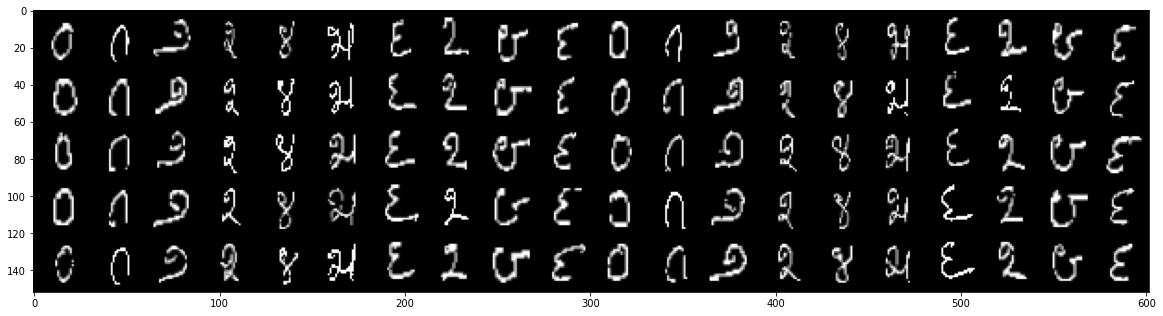

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
for i, (data,label) in enumerate(train_loader):
    #print (i)
    #print ('data',data)
    #print ('data shape',data.shape)
    #print ('label shape',label.shape)
    #print ('label',label)
    #print ('type label', type(label))
    plt.figure(figsize=(20,20))
    grid_image = torchvision.utils.make_grid(data,nrow=20)
    print ('grid_image shape before reshape',grid_image.shape)
    #plt.imshow(grid_image)
    # TypeError: Invalid shape (3, 602, 152) for image data
    #To prevent error, 
    # We need to convert from torch image format Color_channels,Height,Width, to numpy image format Height,Width,Color_channels
    grid_image = grid_image.permute(1,2,0)
    
    print ('grid_image shape after reshape',grid_image.shape)
    plt.imshow(grid_image)
    plt.show()
    break

# Another way to reshape data for display

len 60000
image1 shape torch.Size([100, 1, 28, 28])
image1 shape torch.Size([1, 28, 28])
numpy_image shape (1, 28, 28)
numpy_image_transpose shape (28, 28, 1)


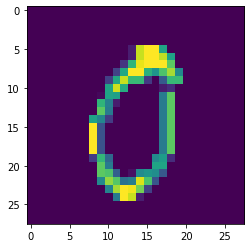

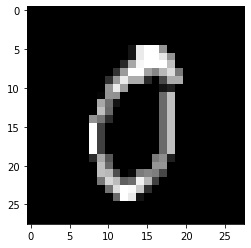

In [9]:
data_iter = iter(train_loader)
sample_data = data_iter.next()
images= sample_data[0]
print ('image1 shape', images.size())
#just look for one image
image1= images[0]
print ('image1 shape',image1.size())
#plt.imshow(image1)
#TypeError: Invalid shape (1, 28, 28) for image data
numpy_image=image1.numpy()
print ('numpy_image shape',numpy_image.shape)
numpy_image_transpose = numpy_image.transpose(1,2,0)
print ('numpy_image_transpose shape',numpy_image_transpose.shape)
plt.imshow(numpy_image_transpose)
plt.show()
plt.imshow(numpy_image_transpose,cmap='gray')


# Define Network Model

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class cnn_net(nn.Module):
    def __init__(self):
        super().__init__()
        #super(cnn_net, self).__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        # for first layer, its based on input size
        #(28-5)/ 1 + 1 = 23/1 + 1 = 24
        self.pool1 = nn.MaxPool2d(2,2)
        #maxpool divides by 2
        #24/2 = 12 
        self.conv2= nn.Conv2d(32,64,5)
        #(12-5)/1 + 1 = 8
        self.pool2=nn.MaxPool2d(2)
        #8/2 = 4
        #self.fc1 = nn.Linear(32 *12 * 12, 1000)
        self.fc1 = nn.Linear(64 *4 * 4, 1000)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500,10)
    
    def forward(self,x):
        
        conv1_x = F.relu(self.conv1(x))
        #print ('conv1_x shape',conv1_x.size())
        pool1_x = self.pool1(conv1_x)
        #print ('pool1_x shape',pool1_x.size())
        
        conv2_x = F.relu(self.conv2(pool1_x))
        #print ('conv2_x shape',conv2_x.size())
        
        pool2_x = self.pool2(conv2_x)
        #print ('pool2_x shape',pool2_x.size())
        
        flatten_x = pool2_x.view(pool2_x.shape[0],-1)
        #flatten_x = torch.flatten(pool1_x, 1)
        #print ('flatten_x shape',flatten_x.size())
        fc1_x = F.relu(self.fc1(flatten_x))
        drop1_x =self.drop1(fc1_x)
        fc2_x = F.relu(self.fc2(drop1_x))
        fc3_x = self.fc3(fc2_x)
        
        return fc3_x
    
mnist_class_net = cnn_net()

# Run a sample image through untrained netwwork 

In [11]:
data_iter = iter(train_loader)
sample_data = data_iter.next()


len 60000


In [12]:
sample_image =sample_data[0]
sample_label = sample_data[1]
print ('sample_image.shape',sample_image.shape)
print ('sample_label shape',sample_label.shape)
print ('sample_image',sample_image)
print ('sample_label ',sample_label)
print ('type label', type(sample_label))

sample_image.shape torch.Size([100, 1, 28, 28])
sample_label shape torch.Size([100])
sample_image tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0.,

# Prediction using untrained network

In [13]:
sample_image = sample_image.type(torch.FloatTensor)

print ('sample_image size',sample_image.size())

#add batch size 
#batch_size


output = mnist_class_net(sample_image)
print ('output.shape',output.shape)
print ('output',output)
max_pred = output.argmax(axis=1)
print ('max_pred shape',max_pred.shape)
print ('max_pred',max_pred)

sample_image size torch.Size([100, 1, 28, 28])
output.shape torch.Size([100, 10])
output tensor([[-4.5718e-02,  1.9906e-02,  1.9954e-02, -2.0375e-02, -3.6529e-02,
          3.0562e-02,  7.3937e-03, -1.6692e-02,  2.6323e-03, -7.0264e-02],
        [-3.7544e-02,  6.0793e-02,  9.4401e-03, -1.8152e-02, -1.6091e-02,
          4.7355e-03,  1.5406e-02, -7.0613e-03,  9.0870e-03, -5.6549e-02],
        [-7.4619e-02,  2.4427e-02,  1.2668e-02, -6.0232e-02, -1.4780e-02,
          1.9615e-02,  2.3784e-02, -1.2208e-02,  2.2177e-03, -6.2208e-02],
        [-3.8746e-02,  2.1570e-02,  5.2011e-03, -2.7188e-02, -2.0487e-02,
          6.4142e-03,  3.3352e-02, -1.1390e-02,  1.9353e-02, -3.3621e-02],
        [-4.0992e-02,  3.5135e-02,  2.9713e-02, -2.6400e-02, -4.9399e-02,
          1.8556e-02,  2.9457e-02, -2.5620e-02, -8.9584e-03, -4.5429e-02],
        [-6.3559e-02,  1.5452e-02,  1.1793e-02, -2.7984e-02, -8.7325e-03,
          1.3919e-02,  2.4581e-02,  1.7247e-02,  4.1934e-02, -4.9795e-02],
        [-6.8787e

In [14]:
# for batch size = 3 
#sample_image size torch.Size([3, 1, 28, 28])
# conv1_x shape torch.Size([3, 32, 24, 24])
# pool1_x shape torch.Size([3, 32, 12, 12])
# flatten_x shape torch.Size([3, 4608])
# output.shape torch.Size([3, 10])
# output tensor([[-10.5510,  -7.6272,   3.9813,   3.3000,   8.1384,  13.5112,   6.8175,
#            9.6002,  -2.8910, -20.6225],
#         [-10.4480,  -3.4611,   7.8698,  -0.8060,  -0.3960,  18.2229,   5.3814,
#            4.8851,  -1.1289, -17.5638],
#         [  2.1741,  -7.3585,  -1.7976,  -6.0594, -18.1774,  13.3852,   6.9136,
#            0.3519,   8.1181,  -5.4966]], grad_fn=<AddmmBackward0>)
# max_pred shape torch.Size([3])
# max_pred tensor([5, 5, 5])

# Train the model

In [15]:
import time
start = time.time()
print ('start',start)



lr = 0.001 # initial learning rate
batch_size = 100 # batch size
epochs = 1 # number of epochs to run

mnist_class_net = cnn_net() # put the model on device (hopefully a GPU!)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =mnist_class_net.parameters(), lr=0.001)

#using params=model.parameters() is very important
#below did not cause convergence
#optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

epochs =10

mnist_class_net.train()

for n in range(epochs):
    
    running_loss = 0 
    cnt= 0
        
    for i, data in enumerate(train_loader):
        cnt+=1
        image =data[0]
        label = data[1]
        
        image = image.type(torch.FloatTensor)
        
        output = mnist_class_net(image)
        
        optimizer.zero_grad()
        
        loss = criterion(output,label)
               
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
                
        if cnt % 100==99:
            print (f' epoch: {n}, i: {i}, running_loss: {running_loss}')
            running_loss = 0
        
        
end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)
        


start 1660695172.5628335
len 60000
 epoch: 0, i: 98, running_loss: 48.350632920861244
 epoch: 0, i: 198, running_loss: 14.974413984455168
 epoch: 0, i: 298, running_loss: 10.822619277751073
 epoch: 0, i: 398, running_loss: 6.622235859744251
 epoch: 0, i: 498, running_loss: 4.363651146239135
 epoch: 0, i: 598, running_loss: 2.83688833785709
len 60000
 epoch: 1, i: 98, running_loss: 11.10853402374778
 epoch: 1, i: 198, running_loss: 7.133353938814253
 epoch: 1, i: 298, running_loss: 3.526161599904299
 epoch: 1, i: 398, running_loss: 4.460663448844571
 epoch: 1, i: 498, running_loss: 2.297781858680537
 epoch: 1, i: 598, running_loss: 1.6082726466993336
len 60000
 epoch: 2, i: 98, running_loss: 6.126755966281053
 epoch: 2, i: 198, running_loss: 5.153129769023508
 epoch: 2, i: 298, running_loss: 2.5008601043373346
 epoch: 2, i: 398, running_loss: 2.7109877388866153
 epoch: 2, i: 498, running_loss: 1.3945544767484535
 epoch: 2, i: 598, running_loss: 1.406978500119294
len 60000
 epoch: 3, i: 

# Run Prediction on test data

In [16]:
kan_mnist_test_data = kan_mnist_dataset('/kaggle/input/Kannada-MNIST/test.csv', test_data=1)
test_loader = DataLoader(kan_mnist_test_data,batch_size=batch_size)

In [17]:
for i, (data) in enumerate(test_loader):
    print (i)
    print ('data',data)
    print ('data shape',data.shape)

    break

len 5000
0
data tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 

In [18]:

all_predictions = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        image = data
        image = image.type(torch.FloatTensor)
        
        batch_prediction = mnist_class_net(image)
        print ('batch_prediction size', batch_prediction.size())
        max_batch_prediction = batch_prediction.argmax(axis=1)
        print ('max_batch_prediction size', max_batch_prediction.size())
        #print ('labels',max_batch_prediction)
        max_batch_prediction_list= max_batch_prediction.tolist()
        #print ('max_batch_prediction squeeze',max_batch_prediction.squeeze().tolist())
        all_predictions.extend(max_batch_prediction_list)
        #print ('all_predictions',all_predictions)

print ('all_predictions len',len(all_predictions))

#print ('all_predictions',all_predictions)
        
    

len 5000
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size torch.Size([100, 10])
max_batch_prediction size torch.Size([100])
batch_prediction size t

In [19]:
test_df= pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
print (test_df.shape)
test_df.head()

(5000, 785)


,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
result_df = test_df[['id']]

In [21]:
result_df ['label'] = all_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
result_df

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


In [23]:
result_df.to_csv('submission.csv',index=False)